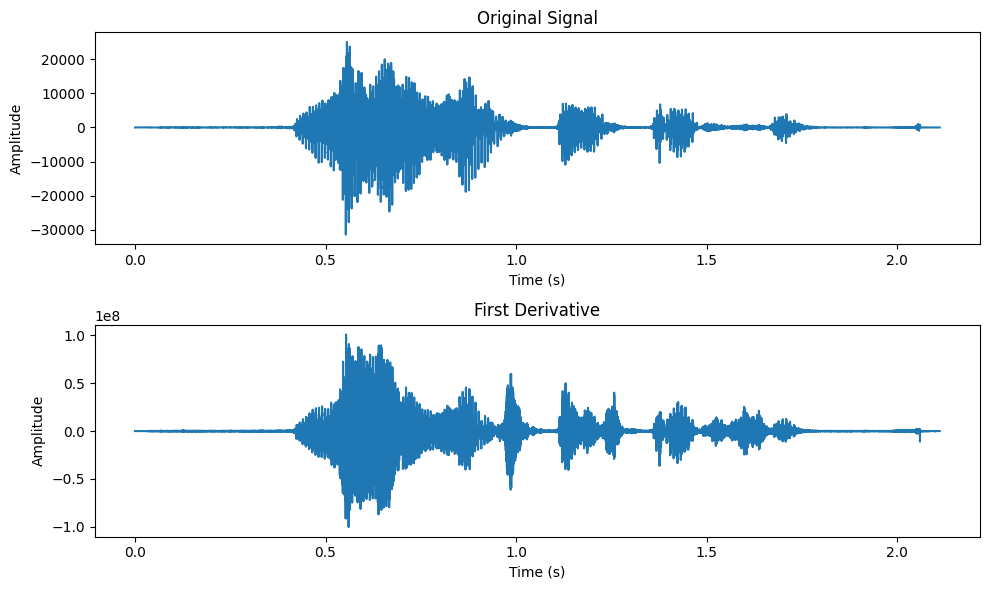

In [6]:
#A1
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Function to compute the first derivative using finite difference method
def finite_difference(signal, sampling_rate):
    dt = 1.0 / sampling_rate
    derivative = np.diff(signal) / dt
    return np.concatenate(([0], derivative))

# Load the WAV file
file_path = '/content/Recording.wav'
sampling_rate, signal = wavfile.read(file_path)

# Compute the first derivative
derivative = finite_difference(signal, sampling_rate)

# Plot the original signal and its derivative
time = np.arange(0, len(signal)) / sampling_rate

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
time_derivative = np.arange(0, len(derivative)) / sampling_rate
plt.plot(time_derivative, derivative)
plt.title('First Derivative')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Average length between zero crossings for speech: 3.5577672003461704 samples
Average length between zero crossings for silence: 2.2513326226012795 samples


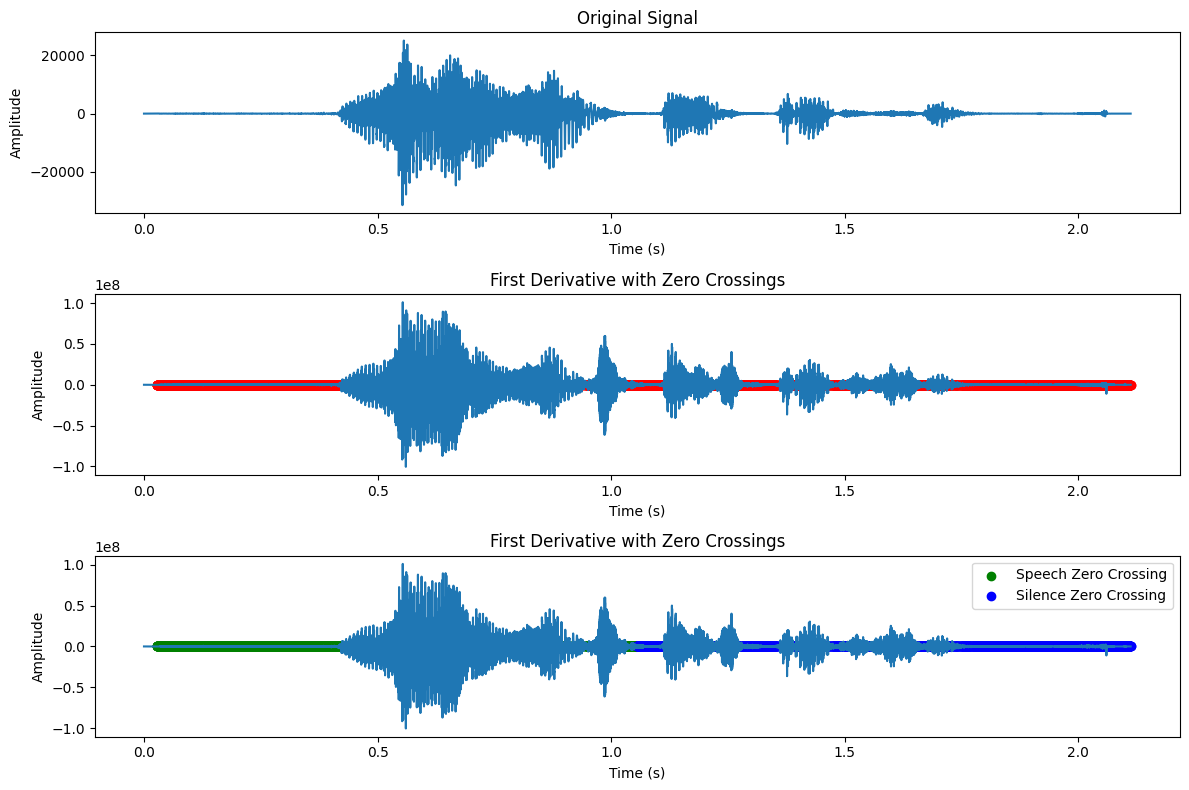

In [3]:
#A2
def finite_difference(signal, sampling_rate):
    dt = 1.0 / sampling_rate
    derivative = np.diff(signal) / dt
    return np.concatenate(([0], derivative))

def zero_crossings(derivative):
    return np.where(np.diff(np.sign(derivative)))[0]

def calculate_average_length(zero_crossings):
    return np.mean(np.diff(zero_crossings))

# Load the WAV file
file_path = '/content/Recording.wav
sampling_rate, signal = wavfile.read(file_path)

# Compute the first derivative
derivative = finite_difference(signal, sampling_rate)

# Detect zero crossings
zero_crossings_indices = zero_crossings(derivative)

# Plot the original signal and its derivative with zero crossings
time = np.arange(0, len(signal)) / sampling_rate

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
time_derivative = np.arange(0, len(derivative)) / sampling_rate
plt.plot(time_derivative, derivative)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.scatter(zero_crossings_indices / sampling_rate, np.zeros_like(zero_crossings_indices), color='red', marker='o', label='Zero Crossing')

# Calculate average length between zero crossings for speech and silence
speech_zero_crossings = zero_crossings_indices[zero_crossings_indices < len(signal) / 2]
silence_zero_crossings = zero_crossings_indices[zero_crossings_indices >= len(signal) / 2]

average_length_speech = calculate_average_length(speech_zero_crossings)
average_length_silence = calculate_average_length(silence_zero_crossings)

print(f"Average length between zero crossings for speech: {average_length_speech} samples")
print(f"Average length between zero crossings for silence: {average_length_silence} samples")

plt.subplot(3, 1, 3)
plt.plot(time_derivative, derivative)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.scatter(speech_zero_crossings / sampling_rate, np.zeros_like(speech_zero_crossings), color='green', marker='o', label='Speech Zero Crossing')
plt.scatter(silence_zero_crossings / sampling_rate, np.zeros_like(silence_zero_crossings), color='blue', marker='o', label='Silence Zero Crossing')
plt.legend()

plt.tight_layout()
plt.show()

The length Duration of first audio file: 7.68 seconds
The length Duration of Second audio file: 7.232018140589569 seconds


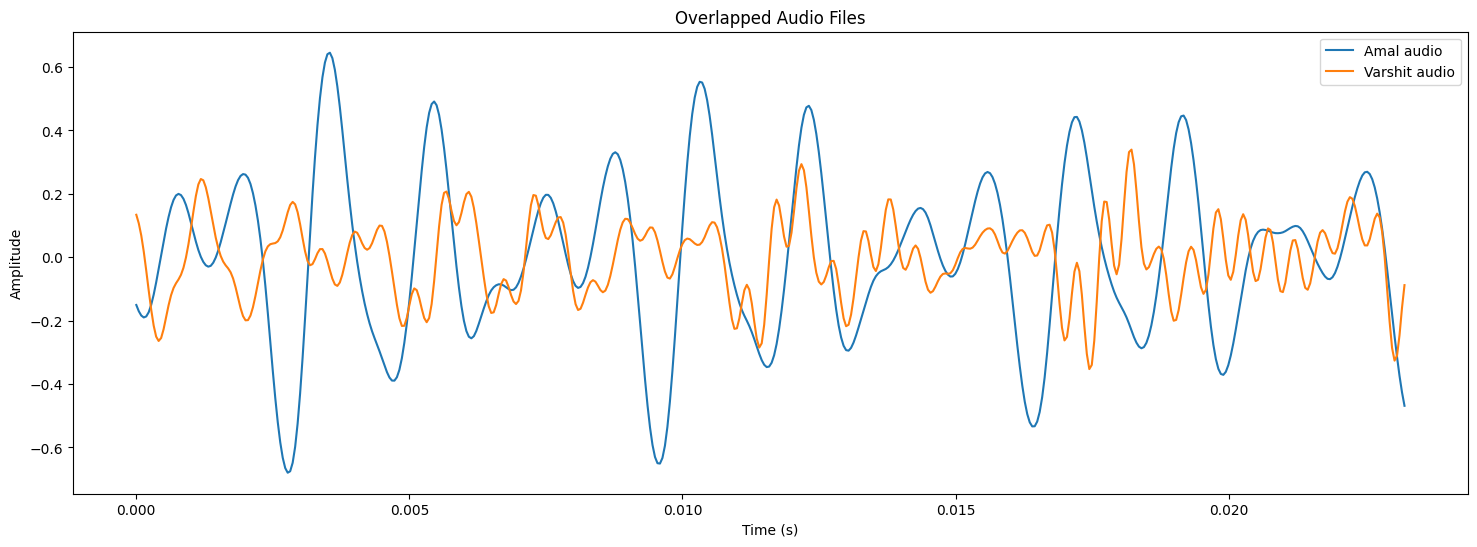

In [7]:
#A3
import librosa.display


audio_file1 = r"/content/akhilesh rec.wav"
audio_file2 = r"/content/subham rec.wav"


# Load audio signals
y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
audio_trimmed1 = remove_silence(y1, sr1)
audio_trimmed2 = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(audio_trimmed1) / sr1, len(audio_trimmed1))
time2 = np.linspace(0, len(audio_trimmed2) / sr2, len(audio_trimmed2))

# Plot the trimmed audio files
plt.figure(figsize=(18, 6))
plt.plot(time1, audio_trimmed1, label='Amal audio')
plt.plot(time2, audio_trimmed2, label='Varshit audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

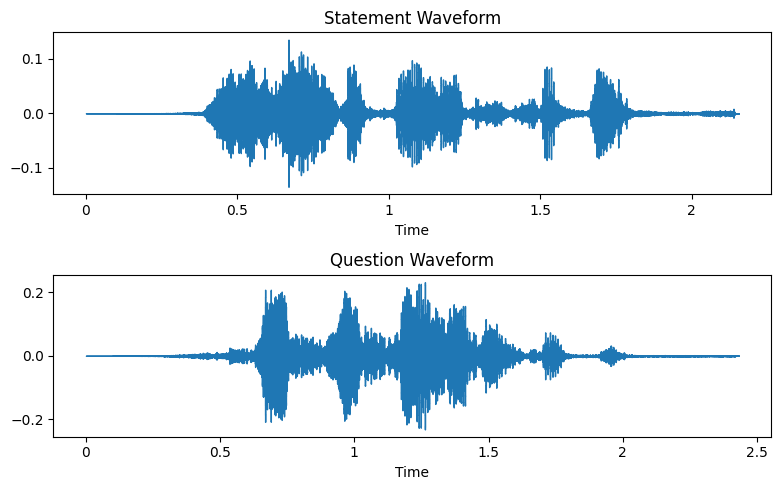

In [8]:
#A4
file1 = r"/content/subham.wav"
file2 = r"/content/akhilesh.wav"
statement_signal, sr_statement = librosa.load(file1) # Load audio signals
question_signal, sr_question = librosa.load(file2)
plt.figure(figsize=(8,5))
# Plot waveforms
plt.subplot(2, 1, 1)
librosa.display.waveshow(statement_signal, sr=sr_statement)
plt.title('Statement Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(question_signal, sr=sr_question)
plt.title('Question Waveform')
plt.tight_layout()
plt.show()